In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv("C:/Users/Vivek negi/Downloads/titanic .csv")

# Exploratory Data Analysis

In [88]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [89]:
df.shape

(891, 12)

In [90]:
df.drop(['PassengerId'],axis=1,inplace=True,)

In [91]:
df['Name'] = df['Name'].str.split().str.slice(start = 0, stop = 3).str.join(' ')

In [92]:
df.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Braund, Mr. Owen",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,"Cumings, Mrs. John",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,"Futrelle, Mrs. Jacques",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,"Allen, Mr. William",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [93]:
df.shape

(891, 11)

In [94]:
df.isnull().sum()

Name          0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

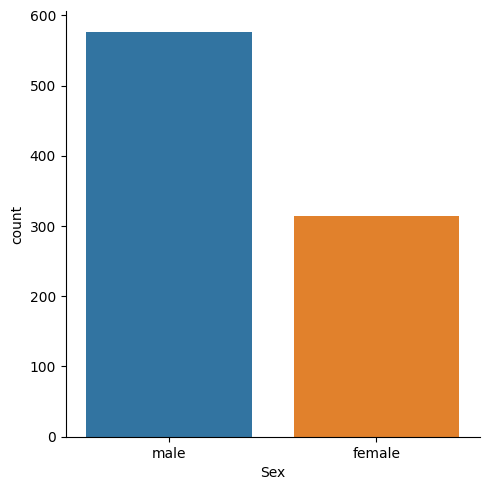

In [95]:
#Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=df,kind='count')

<AxesSubplot: >

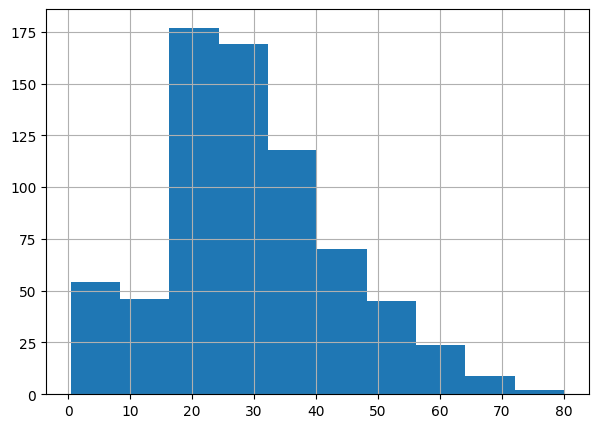

In [96]:
plt.figure(figsize=(7,5))
df['Age'].hist()

In [97]:
# for "Cabin" we can drop NA Values
deck = df.dropna(axis=0)

In [98]:
deck['Deck'] = deck['Cabin'].str.slice(start = 0, stop = 1).str.join(' ')

In [99]:
deck['Deck'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

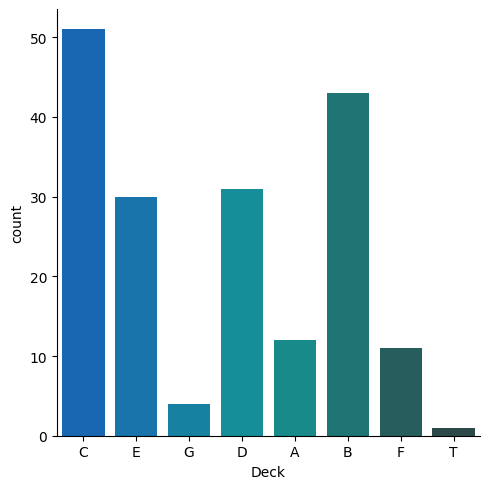

In [100]:
sns.catplot(x='Deck',data=deck,palette='winter_d',kind='count')

In [101]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
# df.drop(['Cabin'],axis='columns',inplace=True)

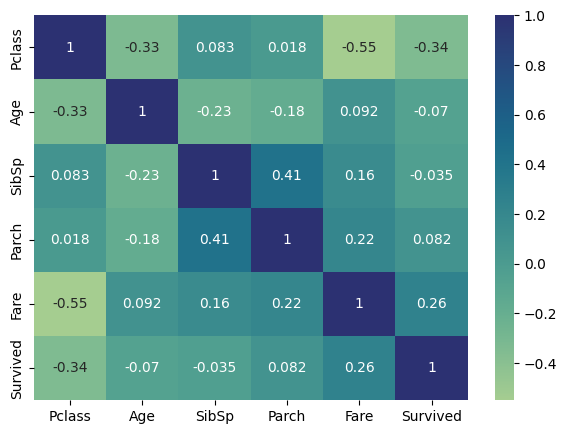

In [102]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

In [103]:
print(df.corr()['Survived'].abs().sort_values(ascending=False)) 

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.069809
SibSp       0.035322
Name: Survived, dtype: float64


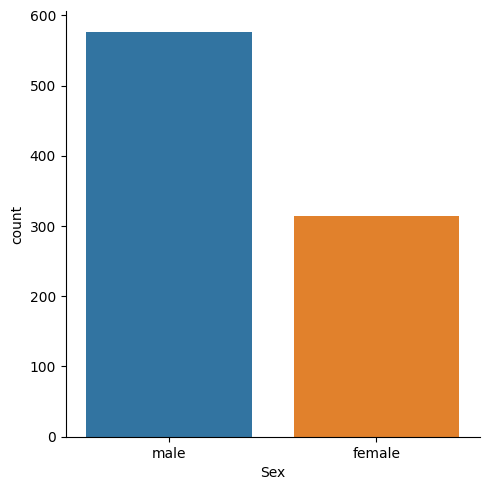

In [104]:
# Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=df,kind='count')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


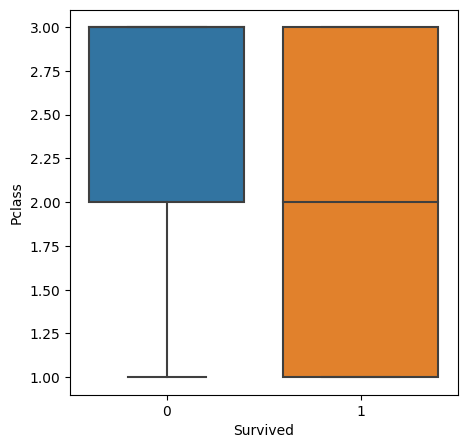

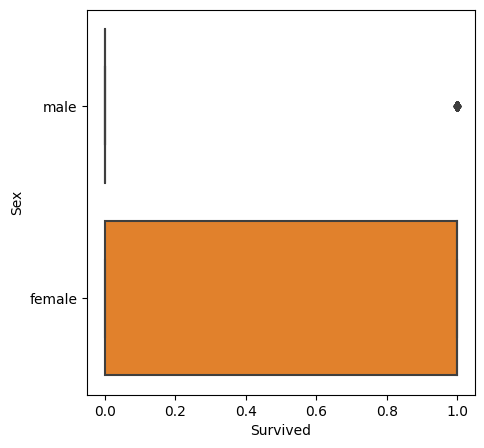

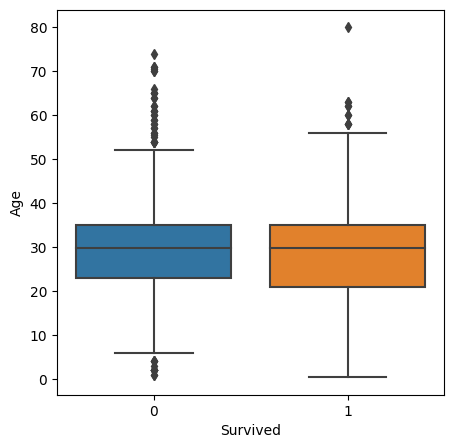

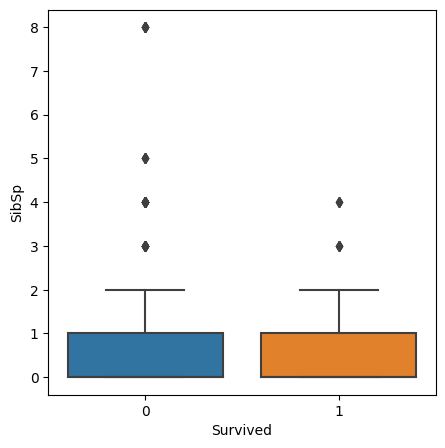

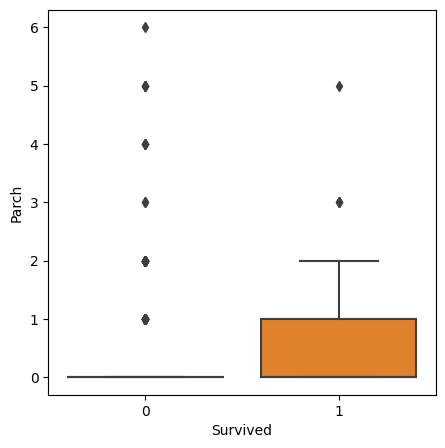

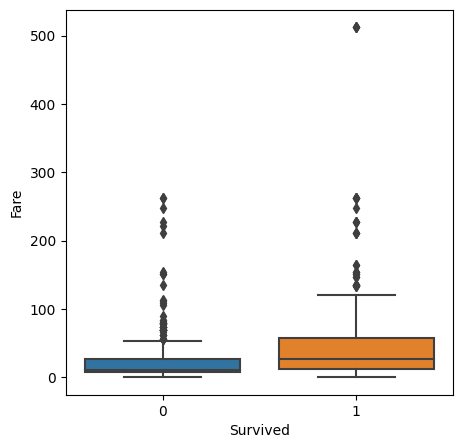

In [106]:
cl=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
for i in cl:
    plt.figure(figsize=(5,5))
    sns.boxplot(x = 'Survived', y = i , data=df)


# encoding and outlier handling

In [107]:
df.drop(['Cabin'],axis='columns',inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical = ['Name','Ticket','Embarked']
for column in categorical:
    df[column] = le.fit_transform(df[column])

In [108]:
df['Sex'] = df['Sex'].replace(['male','female'],[1,0])

In [109]:
df.columns

Index(['Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

In [110]:
row = ['Pclass', 'Age','Sex' , 'SibSp', 'Parch', 'Fare']
for column in row:
    upper_b = df[column].mean() + 3*df[column].std()
    lower_b = df[column].mean() -3*df[column].std()
    df=df[df[column]<upper_b]
    df=df[df[column]>lower_b]


#IQR method 
# for column in row:
#     Q1 = df[i].quantile(0.25)
#     Q3 = df[i].quantile(0.75)
#     iqr = Q3 - Q1
#     print('q1=',Q1,
#           'q3=',Q3,
#          'iqr=',iqr)
#     upper_b = Q3 + iqr*1.5
#     lower_b = Q1 -iqr*1.5
#     df=df[df[i]<upper_b]
#     df=df[df[i]>lower_b]

# machine learning models

In [111]:
x = df.drop(['Survived'],axis='columns')
y = df[[ 'Survived']]

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [113]:
# 1
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# 2
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

# 3
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [114]:
dtc.fit(x_train,y_train)
y_dtcpred=dtc.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score
score_dtc = round(accuracy_score(y_dtcpred,y_test)*100,2)
print('the accuracy score achieved using DecisionTreeClassifier is: ' + str(score_dtc)+'%')

the accuracy score achieved using DecisionTreeClassifier is: 79.67%


In [116]:
clf.fit(x_train,y_train)
y_clfpred=clf.predict(x_test)
score_clf = round(accuracy_score(y_clfpred,y_test)*100,2)
print('the accuracy score achieved using RandomForestClassifier is: ' + str(score_clf)+'%')

the accuracy score achieved using RandomForestClassifier is: 84.96%


In [117]:
lr.fit(x_train,y_train)
y_lrpred=lr.predict(x_test)
score_lr = round(accuracy_score(y_lrpred,y_test)*100,2)
print('the accuracy score achieved using LogisticRegression is: ' + str(score_lr)+'%')

the accuracy score achieved using LogisticRegression is: 81.3%


In [118]:
from sklearn.metrics import confusion_matrix
print(f'this confusion_matrix for decisiontree : \n {confusion_matrix(y_test, y_dtcpred)} ')
print(f'this confusion_matrix for Randomforest :\n {confusion_matrix(y_test, y_clfpred)}')
print(f'this confusion_matrix for logisticregression : \n {confusion_matrix(y_test, y_lrpred)}')

this confusion_matrix for decisiontree : 
 [[124  30]
 [ 20  72]] 
this confusion_matrix for Randomforest :
 [[138  16]
 [ 21  71]]
this confusion_matrix for logisticregression : 
 [[128  26]
 [ 20  72]]


In [119]:
from sklearn.metrics import classification_report
print("this report for decisiontree:\n",classification_report(y_test, y_dtcpred))
print("this report for Randomforest:\n",classification_report(y_test, y_clfpred))
print("this report for logisticregression:\n",classification_report(y_test, y_lrpred))

this report for decisiontree:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       154
           1       0.71      0.78      0.74        92

    accuracy                           0.80       246
   macro avg       0.78      0.79      0.79       246
weighted avg       0.80      0.80      0.80       246

this report for Randomforest:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       154
           1       0.82      0.77      0.79        92

    accuracy                           0.85       246
   macro avg       0.84      0.83      0.84       246
weighted avg       0.85      0.85      0.85       246

this report for logisticregression:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       154
           1       0.73      0.78      0.76        92

    accuracy                           0.81       246
   macro avg       0.80      

In [120]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Vivek negi/Downloads/titanic .csv")
deck_df = df.dropna(axis=0)
def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

deck_df['level']=deck_df.apply(get_level,axis=1)

In [121]:
deck_df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,level
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,C
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,0,E
10,11,"Sandstrom, Miss. Marguerite Rut",3,female,4.0,1,1,PP 9549,16.7000,G6,S,1,G
11,12,"Bonnell, Miss. Elizabeth",1,female,58.0,0,0,113783,26.5500,C103,S,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,female,47.0,1,1,11751,52.5542,D35,S,1,D
872,873,"Carlsson, Mr. Frans Olof",1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,B
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,female,56.0,0,1,11767,83.1583,C50,C,1,C
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1,B
